In [17]:
from crypto_package.candles.get_candles import get_candles
import datetime

In [19]:
candles, _ = get_candles('binance', 'BTC/USDT', '5m', time_start=datetime.datetime(2021,12,6))

świeczki 5m bo BTC jest popularne i ma dużą płynność, a żeby mało sens takie małe świeczi to musi być popularny, żeby byla duża liczba transakcji w okresie czasu i żeby przez to świeczki były odpowiednie, bo jak będzie mało transakcji, to świeczki mogą dawać nieodpowiednie rezultaty/ niewiarygodne  

dla świeczek 5 min jest duży obrót (pokazać volume) więc wydaje sie dobry wybór



In [20]:
candles

,close,high,low,open,time,volume
0,49242.33,49438.18,49218.00,49396.32,1638748800,183.44614
1,49182.71,49356.92,49139.24,49242.34,1638749100,101.96764
2,48855.32,49231.09,48800.40,49182.32,1638749400,215.81803
3,48723.99,49040.12,48625.09,48855.33,1638749700,310.62485
4,48864.00,48907.10,48611.00,48723.99,1638750000,184.37070
...,...,...,...,...,...,...
995,49312.05,49361.61,49300.00,49340.07,1639047300,54.32989
996,49351.71,49420.01,49286.01,49312.05,1639047600,92.41058
997,49303.49,49351.72,49276.62,49351.71,1639047900,87.64900
998,49227.94,49347.59,49222.00,49303.49,1639048200,71.70149


In [21]:
from crypto_package.backtesting import plot_candles
import talib.abstract as ta

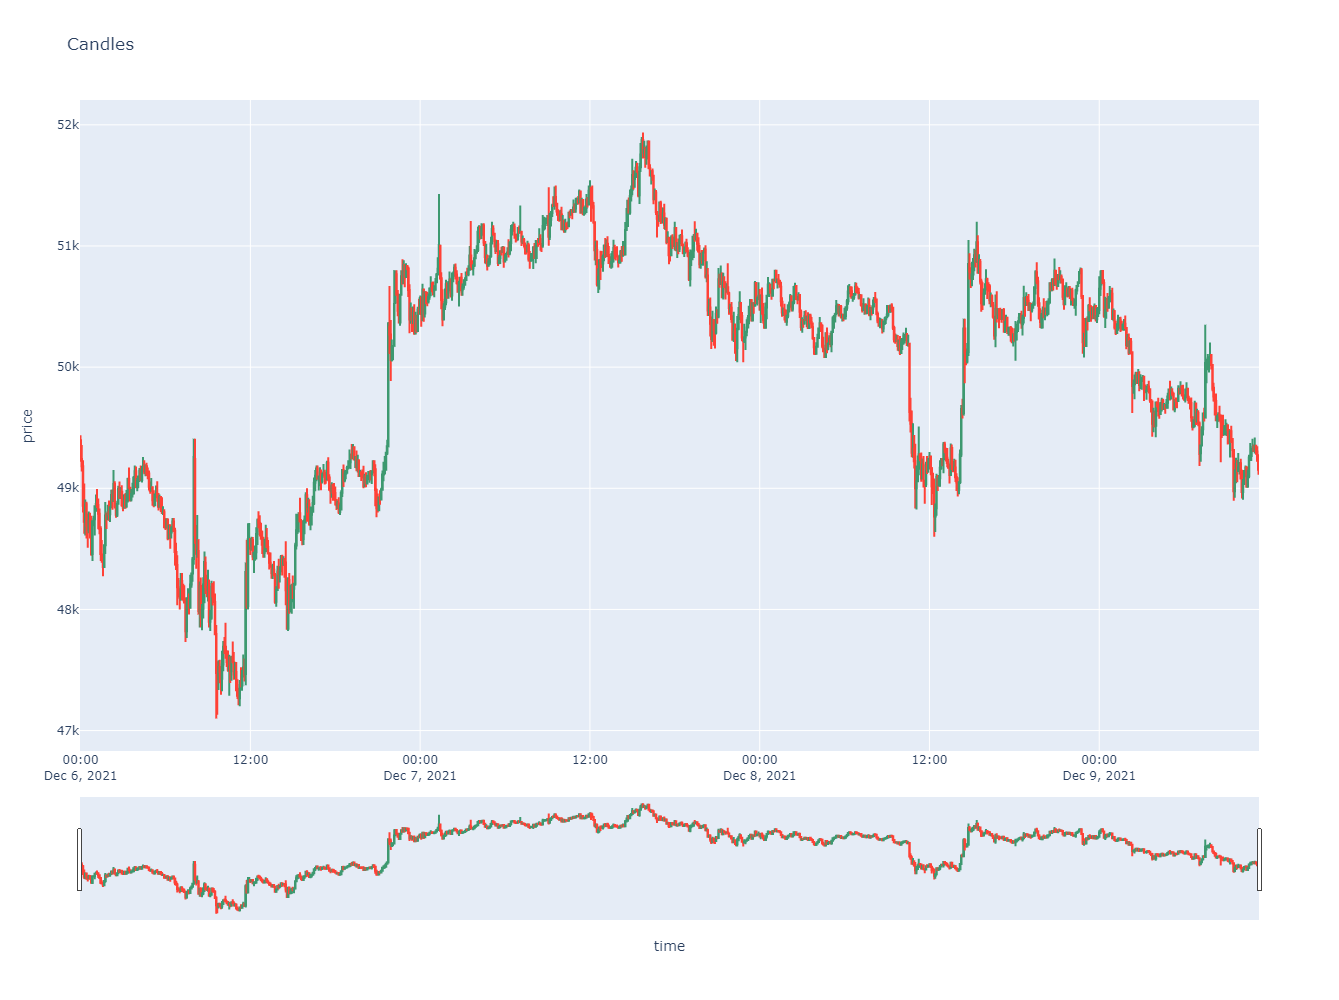

In [22]:
plot_candles(candles, height=1000, width=1300)

analiza wykresu oczowa i powiedzenie że widzimy patterny, o tu młotki, tu objęcia, tu jakieś dzieci porzucone, ale zobaczmy na wykresie, gdzie są te patterny

zacznijmy od objęcia hossty i bessy

In [23]:
candles['eng'] = ta.CDLENGULFING(candles)

In [25]:
from crypto_package.backtesting import plot_indicators
from pandas import to_datetime
import plotly.graph_objects as go
from random import randint

def plot_indicators_on_candles(indicators_df, indicators, width: int = 1000,
                    height: int = 650):  # indicators_df contains columns with indicators and column "date" with datetime
    if "time" in indicators_df.columns:
        indicators_df = indicators_df.rename(columns={"time": "date"})
    if type(indicators_df["date"][0]) is not datetime:
        indicators_df["date"] = to_datetime(indicators_df["date"], unit='s')

    fig = go.Figure()

    fig.add_trace(go.Candlestick(
        x=indicators_df['date'],
        open=indicators_df['open'],
        high=indicators_df['high'],
        low=indicators_df['low'],
        close=indicators_df['close']))

    for ind in indicators:
        xup =[]
        xdown = []
        yup = []
        ydown = []
        
        for idx, row in indicators_df.iterrows():
            if row[ind]==100:
                xup.append(row['date'])
                yup.append(50+((row['open']+row['close'])/2)+abs(row['open']-row['close']))
            elif row[ind]==-100:
                xdown.append(row['date'])
                ydown.append(-50+((row['open']+row['close'])/2)+abs(row['open']-row['close']))
        
        color = 'green' if len(indicators)<=2 else randint(1,500)
        fig.add_trace(go.Scatter(
            x=xup,
            y=yup,
            mode='markers',
            marker=dict(
                color=color,
                line_width=1,
                size=8,
            ),
            marker_symbol='triangle-up',
            name=ind+" bullish",
        ))
        color = 'red' if len(indicators)<=2 else randint(1,500)
        fig.add_trace(go.Scatter(
            x=xdown,
            y=ydown,
            mode='markers',
            marker=dict(
                color=color,
                line_width=1,
                size=8,
            ),
            marker_symbol='triangle-down',
            name=ind+" bearish",
        ))
    fig.update_layout(
        title="Indicators on candles",
        xaxis_title="time",
        yaxis_title="value",
        width=width,
        height=height
    )
    fig.show()

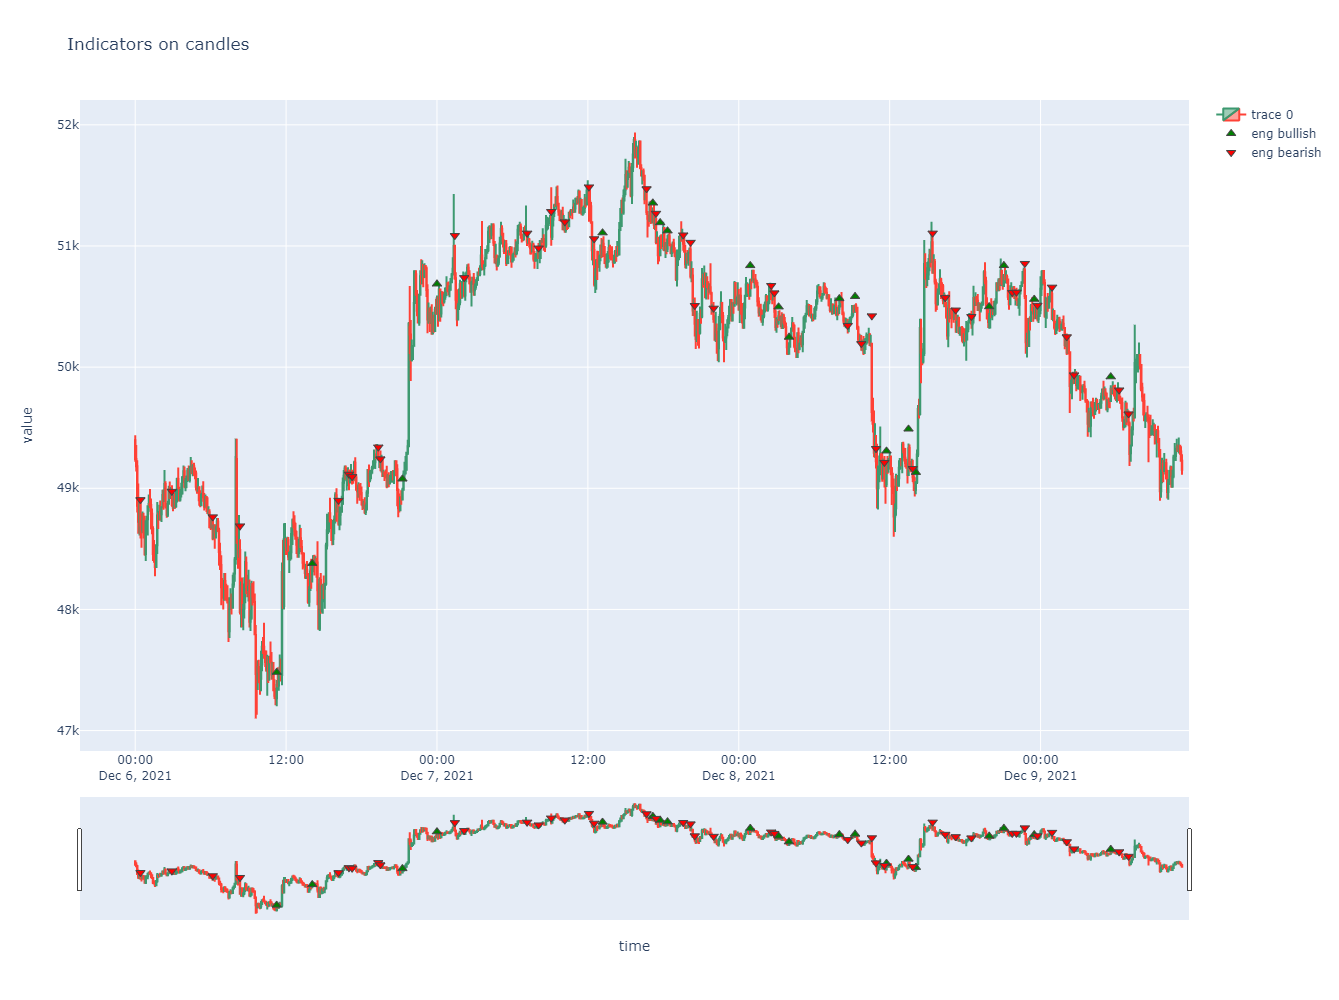

In [26]:
plot_indicators_on_candles(candles, ['eng'], width=1400, height=1000)

możemy zauważyć, że predykcje się generalnie potwierdzają w większości przypadków, ale czasem są trochę bezsensowne - wskazują spadki, gdy spadki są minimalne oraz sam tej pattern nie jest w stanie wyłapac wszytskich dołków i górek, dlatgeo trzeba wprowadzic też inne (patterny nie wyłapują wszytskich spadków w których można kupić i wzrostów w których można sprzedaćscreen że działa generalnie)


6.12 np mamy też młotki obok objęcia hossy i widzimy, że kilka patternów wystąpiło obok siebie, dzięki czemu można wnioskować że rynek zachowa się dziwnie -> warto wprowadzić młotki
7.12 o 2.45 widać  w dołku fakey setup to mona też wpleść
(dla BNB, dla BTC to nw)

musimy kupować mniej więcej tam gdzie jest sygnał że będzie spadać - to będzie najwyższy punkt w danej lokalnej strefie
ale dobrze byłoby tez sprawdzać czy ten sygnał, ktory mamy to pierwszy sygnał z tej kategorii - jak to jest drugi sygnał że bd spadać to nie ma co sprzedawać bo prawdopodobnie spada od czasu tamtego sygnału.

   
to teraz młotki i wisielce



In [27]:
candles['hammer'] = ta.CDLHAMMER(candles)
candles['hang'] = ta.CDLHANGINGMAN(candles)

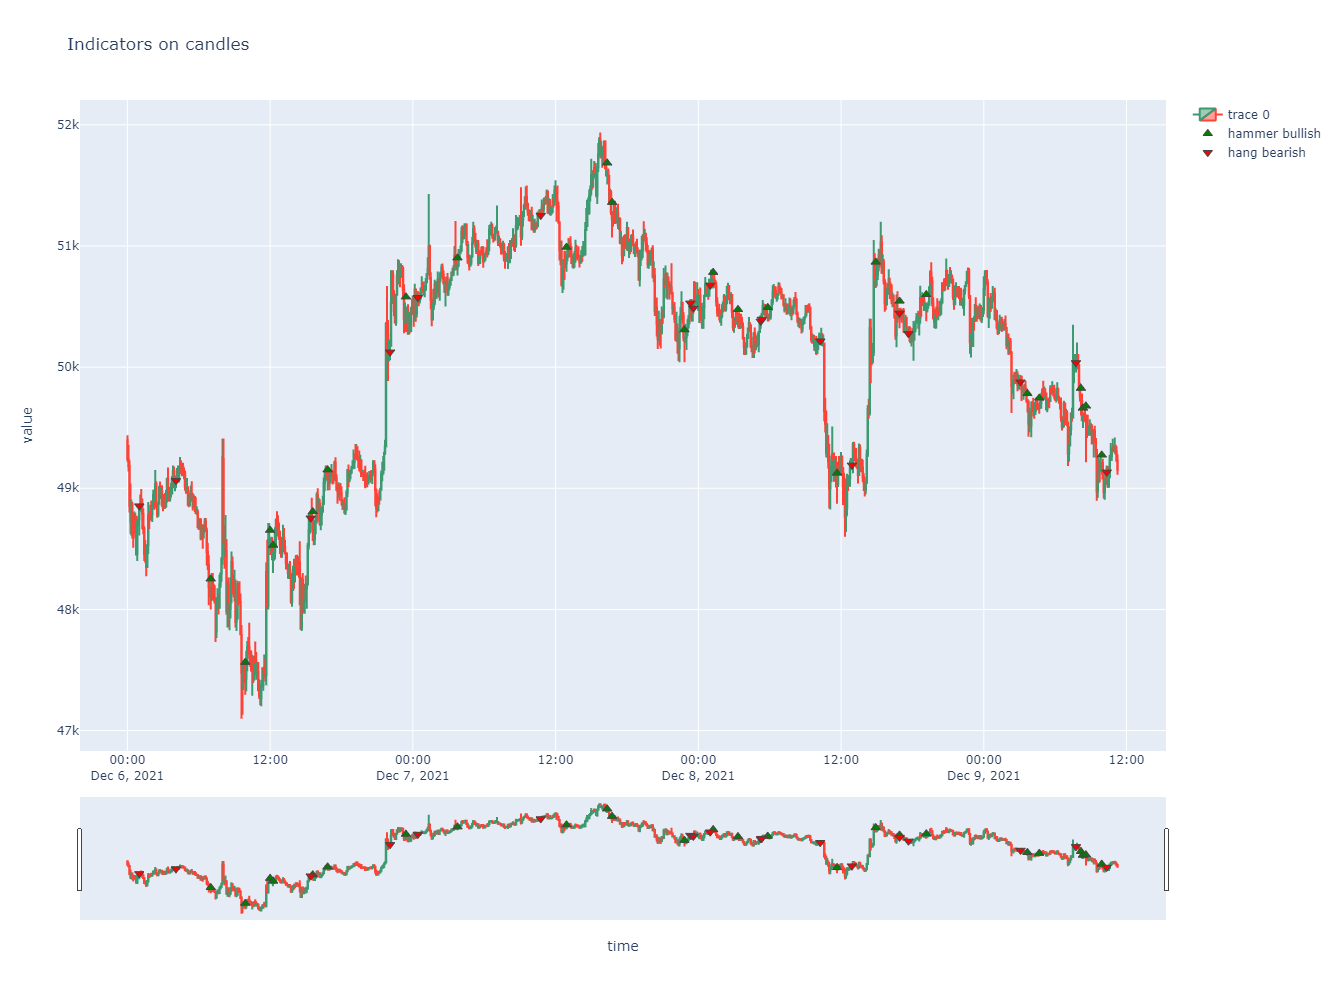

In [28]:
plot_indicators_on_candles(candles, ['hammer', 'hang'], width=1400, height=1000)

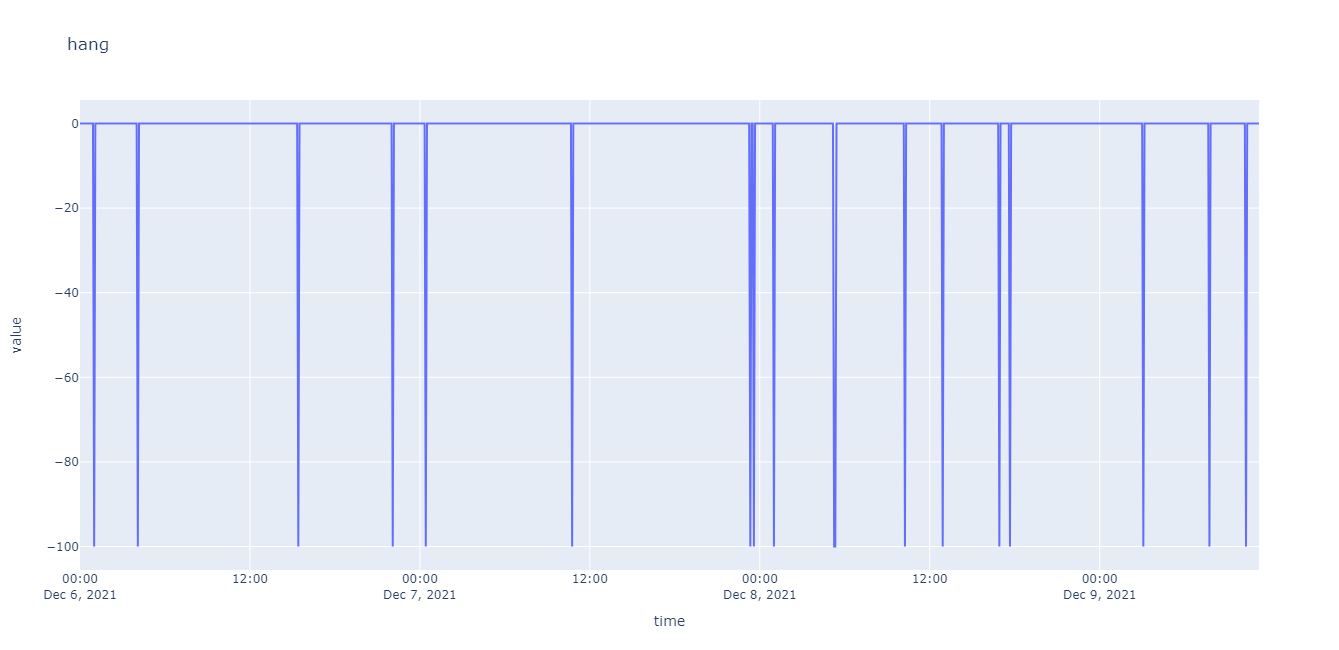

In [29]:
plot_indicators(candles,['hang'])

jednak one słabo dają jakies info, spróbujmy z objęciami

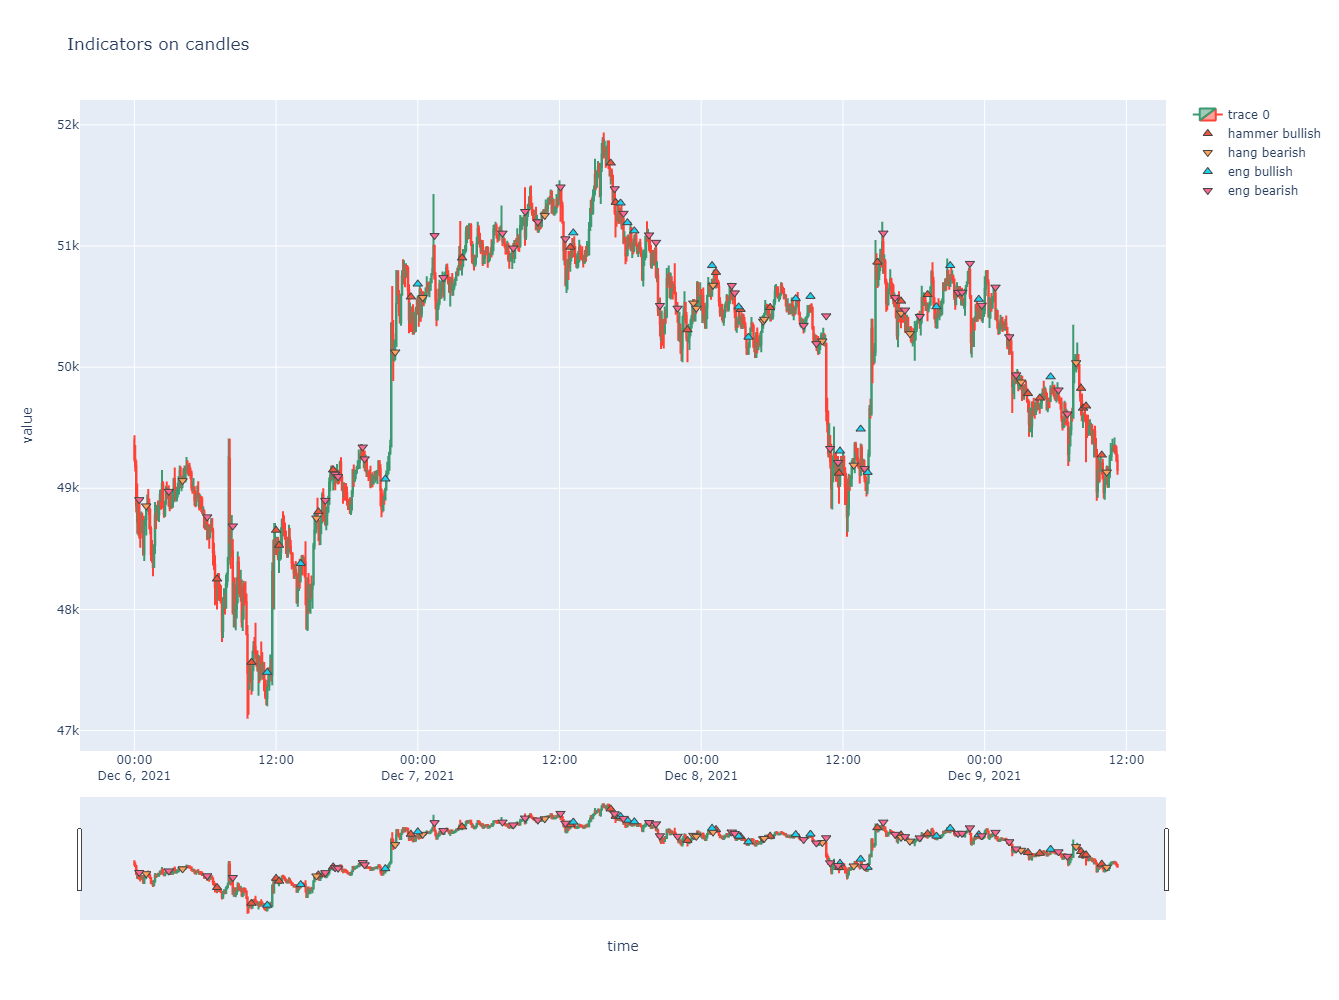

In [30]:
plot_indicators_on_candles(candles, ['hammer', 'hang', 'eng'], width=1400, height=1000)

6.12 widze  dowróceone młotki, trzeba sie dowiedzieć co one znacz ą i czym się różni wisielec od młotka  

widać że nie wszystkie mają sens bo czasem wzrosty i spacki są bardzo bardzo niewielkie (takie na jedną świeczkę)   
w takim razie może zmniejszyć interwał czasowy świeczki na np 1m - obrót wtedy jest ok 250tys usdt i sprzedaje się ok 5 btc to chyba dobry wolumen (czy obrót ma wpływ na świeczki?), więc możemy zmniejszyć interwał i zobaczyć jak się prezentują mlotki

ale hammer wg taliba ma bbardzo bardzo mały cień górny

In [31]:
candles1, _ = get_candles('binance', 'BTC/USDT', '1m', time_start=datetime.datetime(2021,12,6))

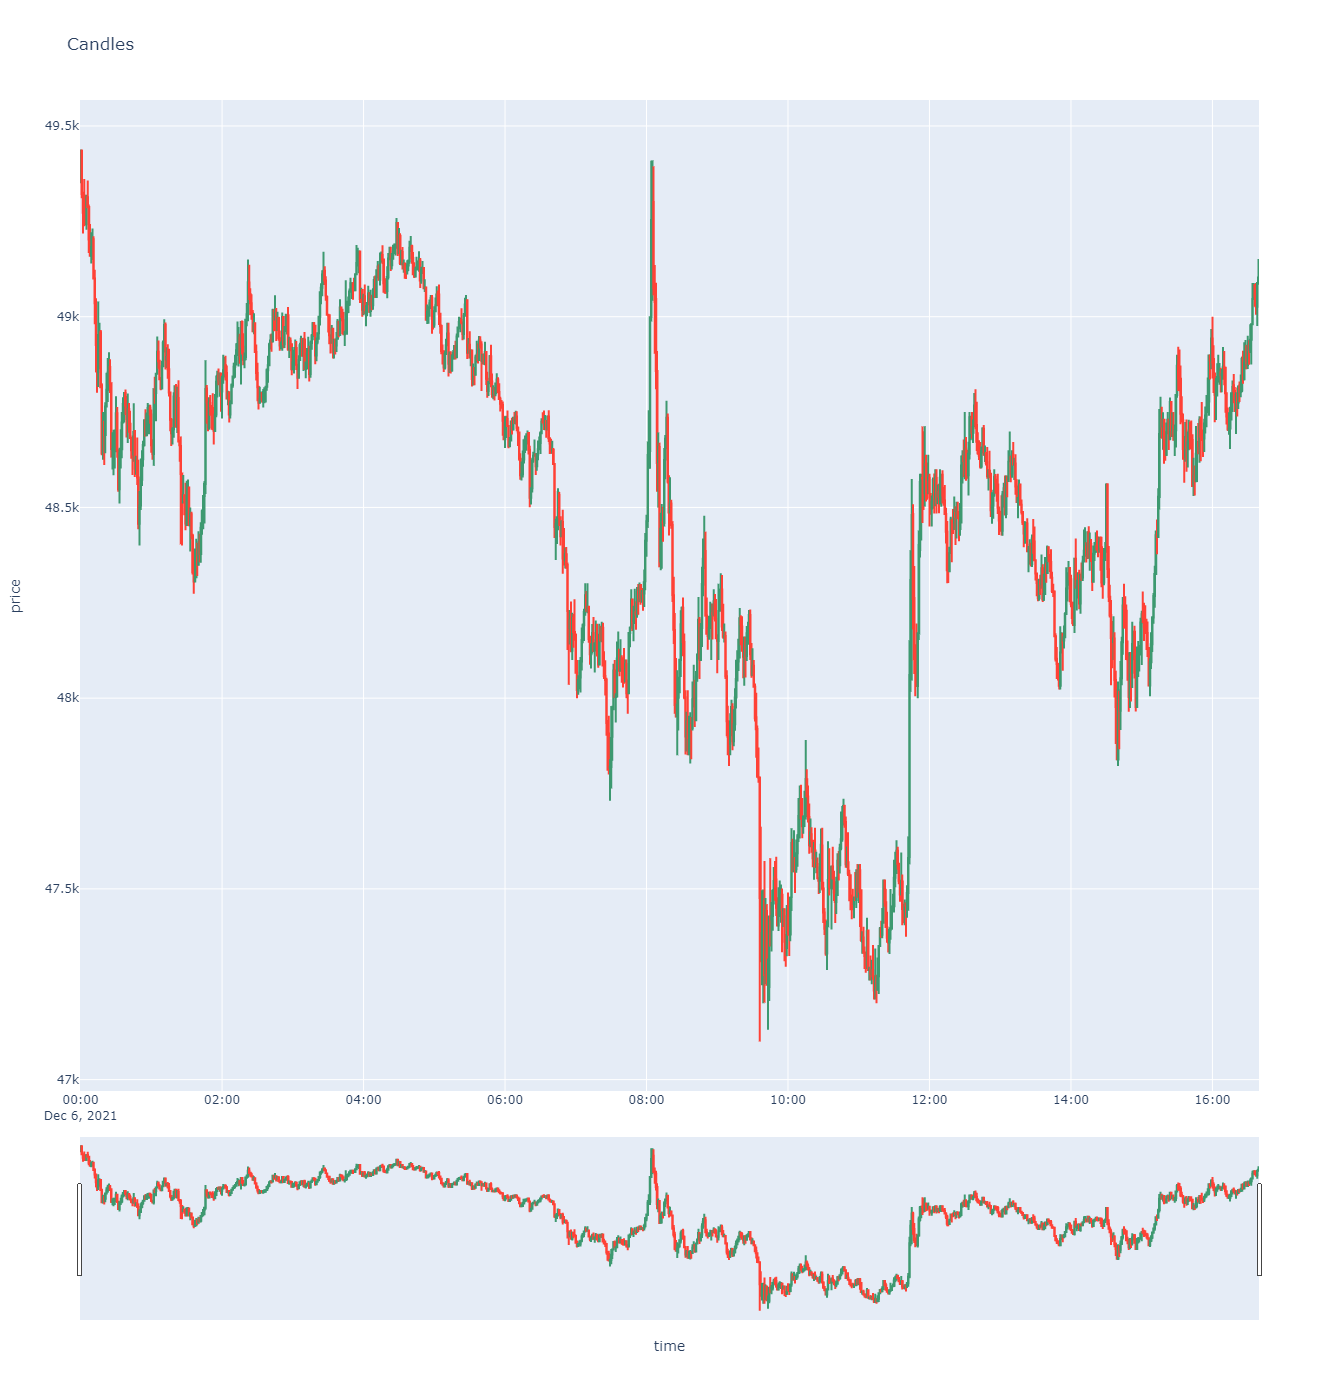

In [32]:
plot_candles(candles1, width=1300, height=1400)

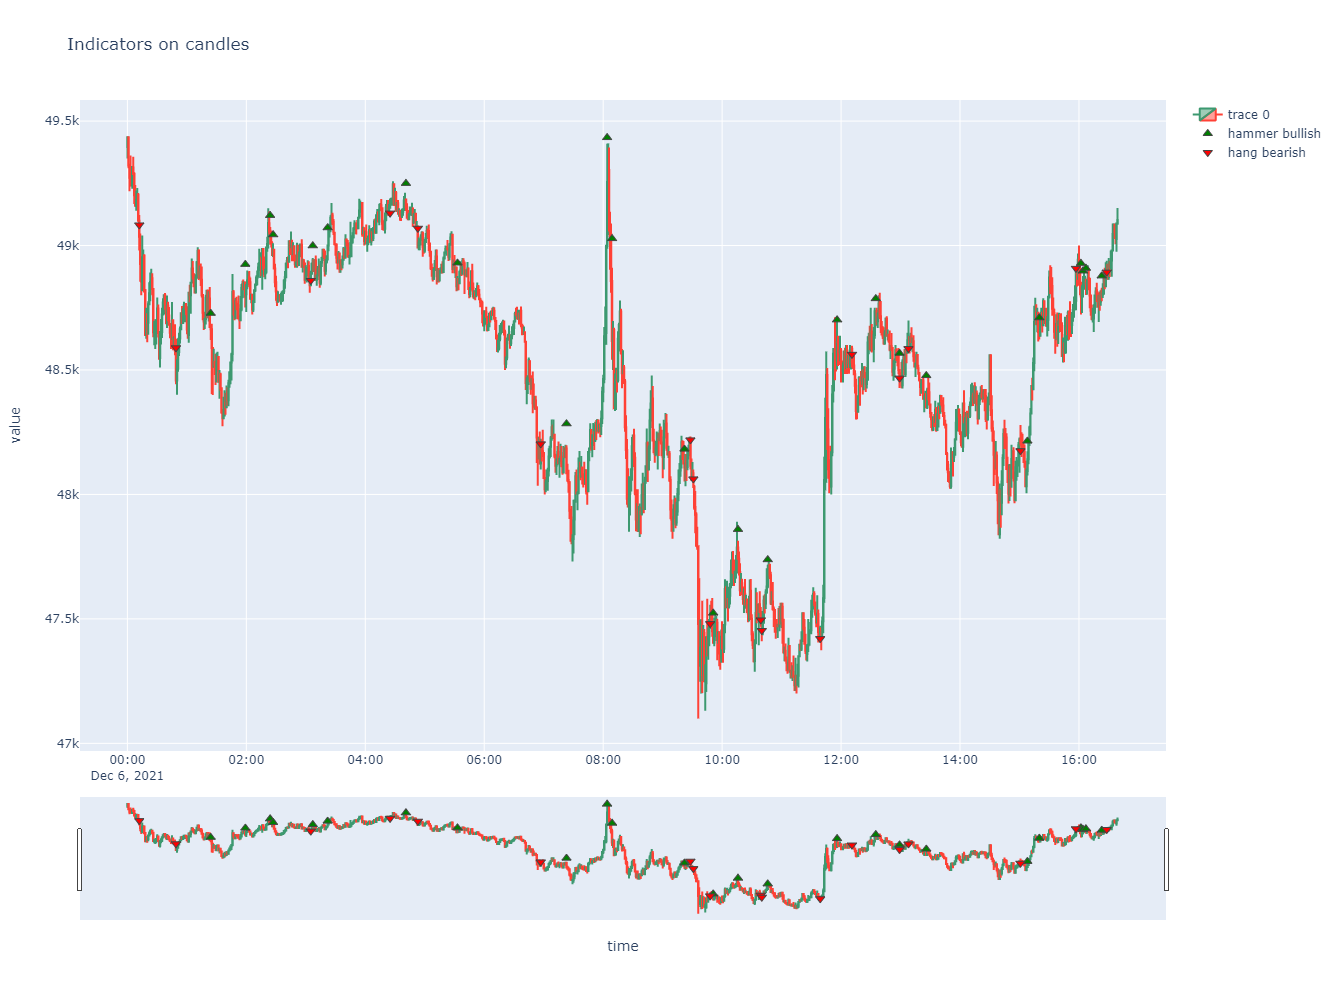

In [36]:
candles1['hammer'] = ta.CDLHAMMER(candles)
candles1['hang'] = ta.CDLHANGINGMAN(candles)
plot_indicators_on_candles(candles1, ['hammer', 'hang'], width=1400, height=1000)

młotek i wisielec nie działają

In [33]:
from crypto_package.backtesting import BacktestingBot

def calc_indicators(candles):
        # print(candles)
        # candles = candles.rename(columns={"time": "date"})
        # candles["date"] = to_datetime(candles["date"], unit='s')
        candles['rsi'] = ta.RSI(candles, timeperiod=14)
        # print(candles)
        return candles

def check_sell_signals(indicators):
    if indicators.iloc[-1]['rsi'] > 70:
        return True
    else:
        return False

def check_buy_signals(indicators):
    if indicators.iloc[-1]['rsi'] < 30:
        return True
    else:
        return False

    
fbot = BacktestingBot("simple_strategy/config.yml")
res0 = fbot.test_strategy(calc_indicators, check_buy_signals, check_sell_signals, last_n_days=20)

/tmp/ipykernel_69/3205849244.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Exception: inputs are all NaN